In [1]:
import sys
import pandas as pd
import requests
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
income_2000_2016 = pd.read_excel('MedianAnnualIncome.xlsx')
income_2000_2016

,Years,Median income
0,2000,50800
1,2001,53500
2,2002,55000
3,2003,56000
4,2004,58100
5,2005,60600
6,2006,63600
7,2007,66550
8,2008,68860
9,2009,68410


In [3]:
median_income = income_2000_2016.drop([15,16], axis=0)
median_income

,Years,Median income
0,2000,50800
1,2001,53500
2,2002,55000
3,2003,56000
4,2004,58100
5,2005,60600
6,2006,63600
7,2007,66550
8,2008,68860
9,2009,68410


In [4]:
migration_data = pd.read_csv('../resources/newnationalmigration_clean.csv')
crime_data = pd.read_csv('../resources/TotalCrimeCanada.csv')
migration_data = migration_data[(migration_data['Date'] >= 2000) & (migration_data['Date'] <= 2014)]
migration_data

,Date,National Net Migration
54,2000,198753
55,2001,241733
56,2002,212505
57,2003,195200
58,2004,198178
59,2005,216053
60,2006,220354
61,2007,234873
62,2008,272667
63,2009,272256


[Text(0,0.5,'Net National Migration'),
 Text(0.5,0,'Median Income'),
 Text(0.5,1,'Median Income and Net National Migration')]

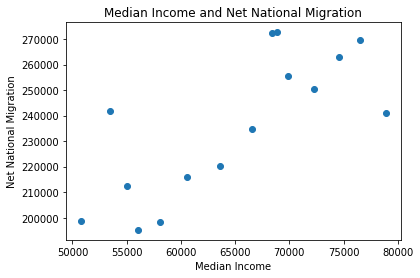

In [5]:
fig, axes = plt.subplots()
axes.scatter(median_income['Median income'], migration_data['National Net Migration'])
axes.set(title = 'Median Income and Net National Migration', xlabel  = 'Median Income', ylabel = 'Net National Migration')

In [6]:
migration_slope, migration_int,migration_r, migration_p, migration_std_err = stats.linregress(
    median_income['Median income'], migration_data['National Net Migration'])
migration_fit = migration_slope * median_income['Median income'] + migration_int

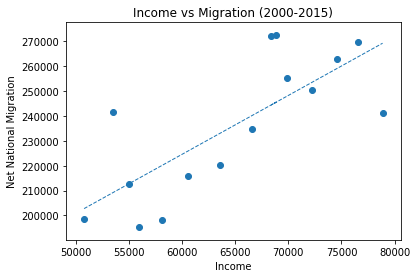

0.7558167071942112
0.0011161551056885928
0.56917962469524


In [8]:
plt.plot(median_income['Median income'], migration_fit, linestyle= "--", linewidth=1)
plt.scatter(median_income['Median income'], migration_data['National Net Migration'])

plt.title("Income vs Migration (2000-2015)")
plt.xlabel("Income")
plt.ylabel("Net National Migration")
plt.savefig("IncomevsCPI.png")
plt.show()

print(migration_r)
print(migration_p)
print(migration_std_err)